In [1]:
from utils.data_utils import get_batch_data
from PIL import Image
import numpy as np
import random
import config
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def mk_list(file_list):
    img_files = []
    with open(file_list) as f:
        for line in f:
            img_files.append(line.strip())
    
    random.shuffle(img_files)

    return img_files

In [3]:
def train_val_split():
    train_files = mk_list(config.TRAIN_FILE)
    valid_files = train_files[:config.VALID_SIZE]
    train_files = train_files[config.VALID_SIZE:]
    num_train = len(train_files) // config.BATCH_SIZE
    num_valid = len(valid_files) // config.BATCH_SIZE

    return train_files, valid_files, num_train, num_valid

In [4]:
def get_batch(file_list, batch_size=config.BATCH_SIZE):
    n = 0
    batch_files = []
    for i in range(len(file_list)):
        batch_files.append(file_list[i])
        n += 1
        if n >= batch_size:

            yield batch_files
            n = 0
            batch_files = []

In [5]:
train_img, valid_img, num_train, num_valid = train_val_split()

In [6]:
data_gen = get_batch(train_img)
print(data_gen)

<generator object get_batch at 0x0000023FA5ADD048>


In [7]:
batch_files = next(data_gen)
print(batch_files)

['8ff097c688c6461e9512a2dbdae9d2b3', 'c52b19da3c234235bb16666dca88a9ea', 'b6800fc05c30460596f03069545f955c', 'cd417574deed427fba61f84c9229c0c3', '519349c684e041d68a2577e6cabf8e59', '83b49de087284eb5a853277eeea27f84', '6bf7724bd71747859c6f6a783f62dfc1', '9f5435013cf145a7a2f1eeca87cc15b9']


In [8]:
def plt_img_file(img_name):
    img_path = config.DATA_PATH + '/images/' + img_name + '.jpg'
    img = mpimg.imread(img_path)
    imgplt = plt.imshow(img)
    plt.show()

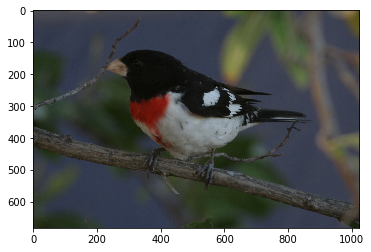

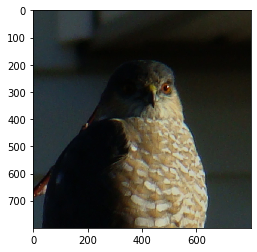

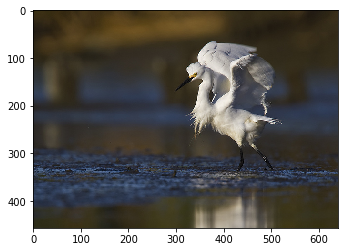

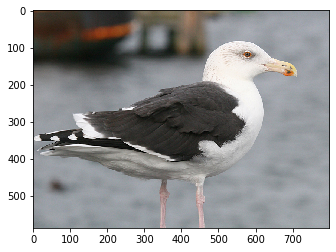

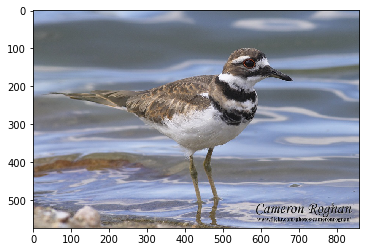

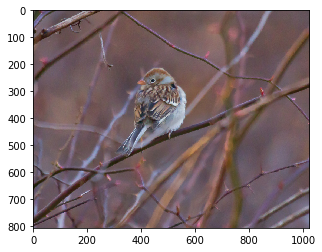

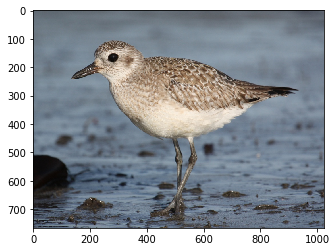

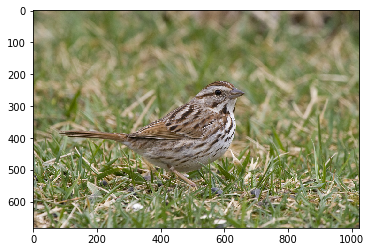

In [9]:
for img in batch_files:
    plt_img_file(img)

In [10]:
img_batch, label_batch = get_batch_data(batch_files)

In [11]:
def plt_img_array(img_array):
    img = Image.fromarray(img_array, 'RGB')
    imgplt = plt.imshow(img)
    plt.show()

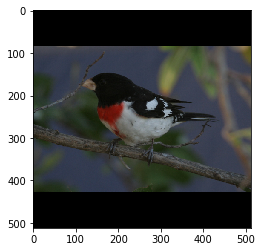

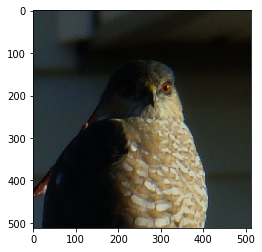

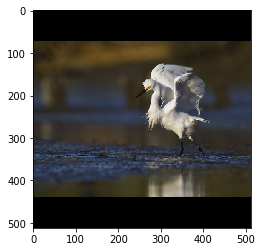

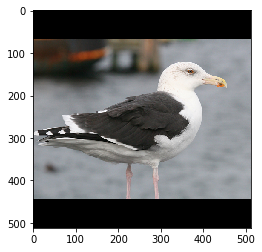

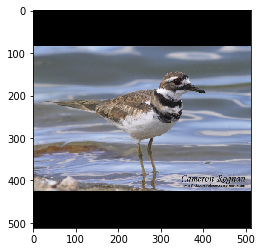

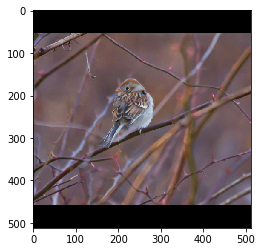

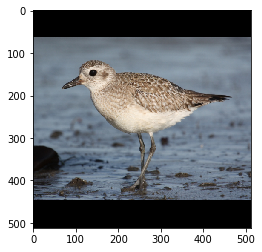

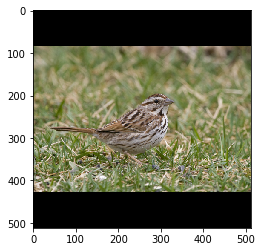

In [12]:
for img in img_batch:
    img *= 255
    plt_img_array(img.astype(np.uint8))

In [13]:
def resize_image(img_path):
    img = cv.imread(img_path)
    height, width = img.shape[:2]

    resize_ratio = min(config.IMG_INPUT_SIZE[0] / width, config.IMG_INPUT_SIZE[1] / height)

    new_height = int(round(height * resize_ratio))
    new_width = int(round(width * resize_ratio))

    img = cv.resize(img, (new_width, new_height))
    padded_img = np.full((config.IMG_INPUT_SIZE[0],config.IMG_INPUT_SIZE[1],3),0,np.uint8)

    pad_w = int((config.IMG_INPUT_SIZE[0] - new_width) / 2)
    pad_h = int((config.IMG_INPUT_SIZE[1] - new_height) / 2)

    padded_img[pad_h:new_height+pad_h, pad_w:new_width+pad_w] = img

    padded_img = cv.cvtColor(padded_img, cv.COLOR_BGR2RGB).astype(np.float32)
    padded_img = padded_img / 255

    return padded_img, CELL_SIZE, resize_ratio, pad_w, pad_h